# Importing libraries

In [1]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn import metrics
import xgboost as xgb



import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [3]:
df = pd.read_csv("C:/Users/Asus/Downloads/Capstone/archive/creditcard.csv")

# Initial Analysis

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Findings
1. There are no missing values
2. There are 30 independent variables
3. Standardization required as all the variables are on different scale 

# Exploratory Data Analysis

## Correlation

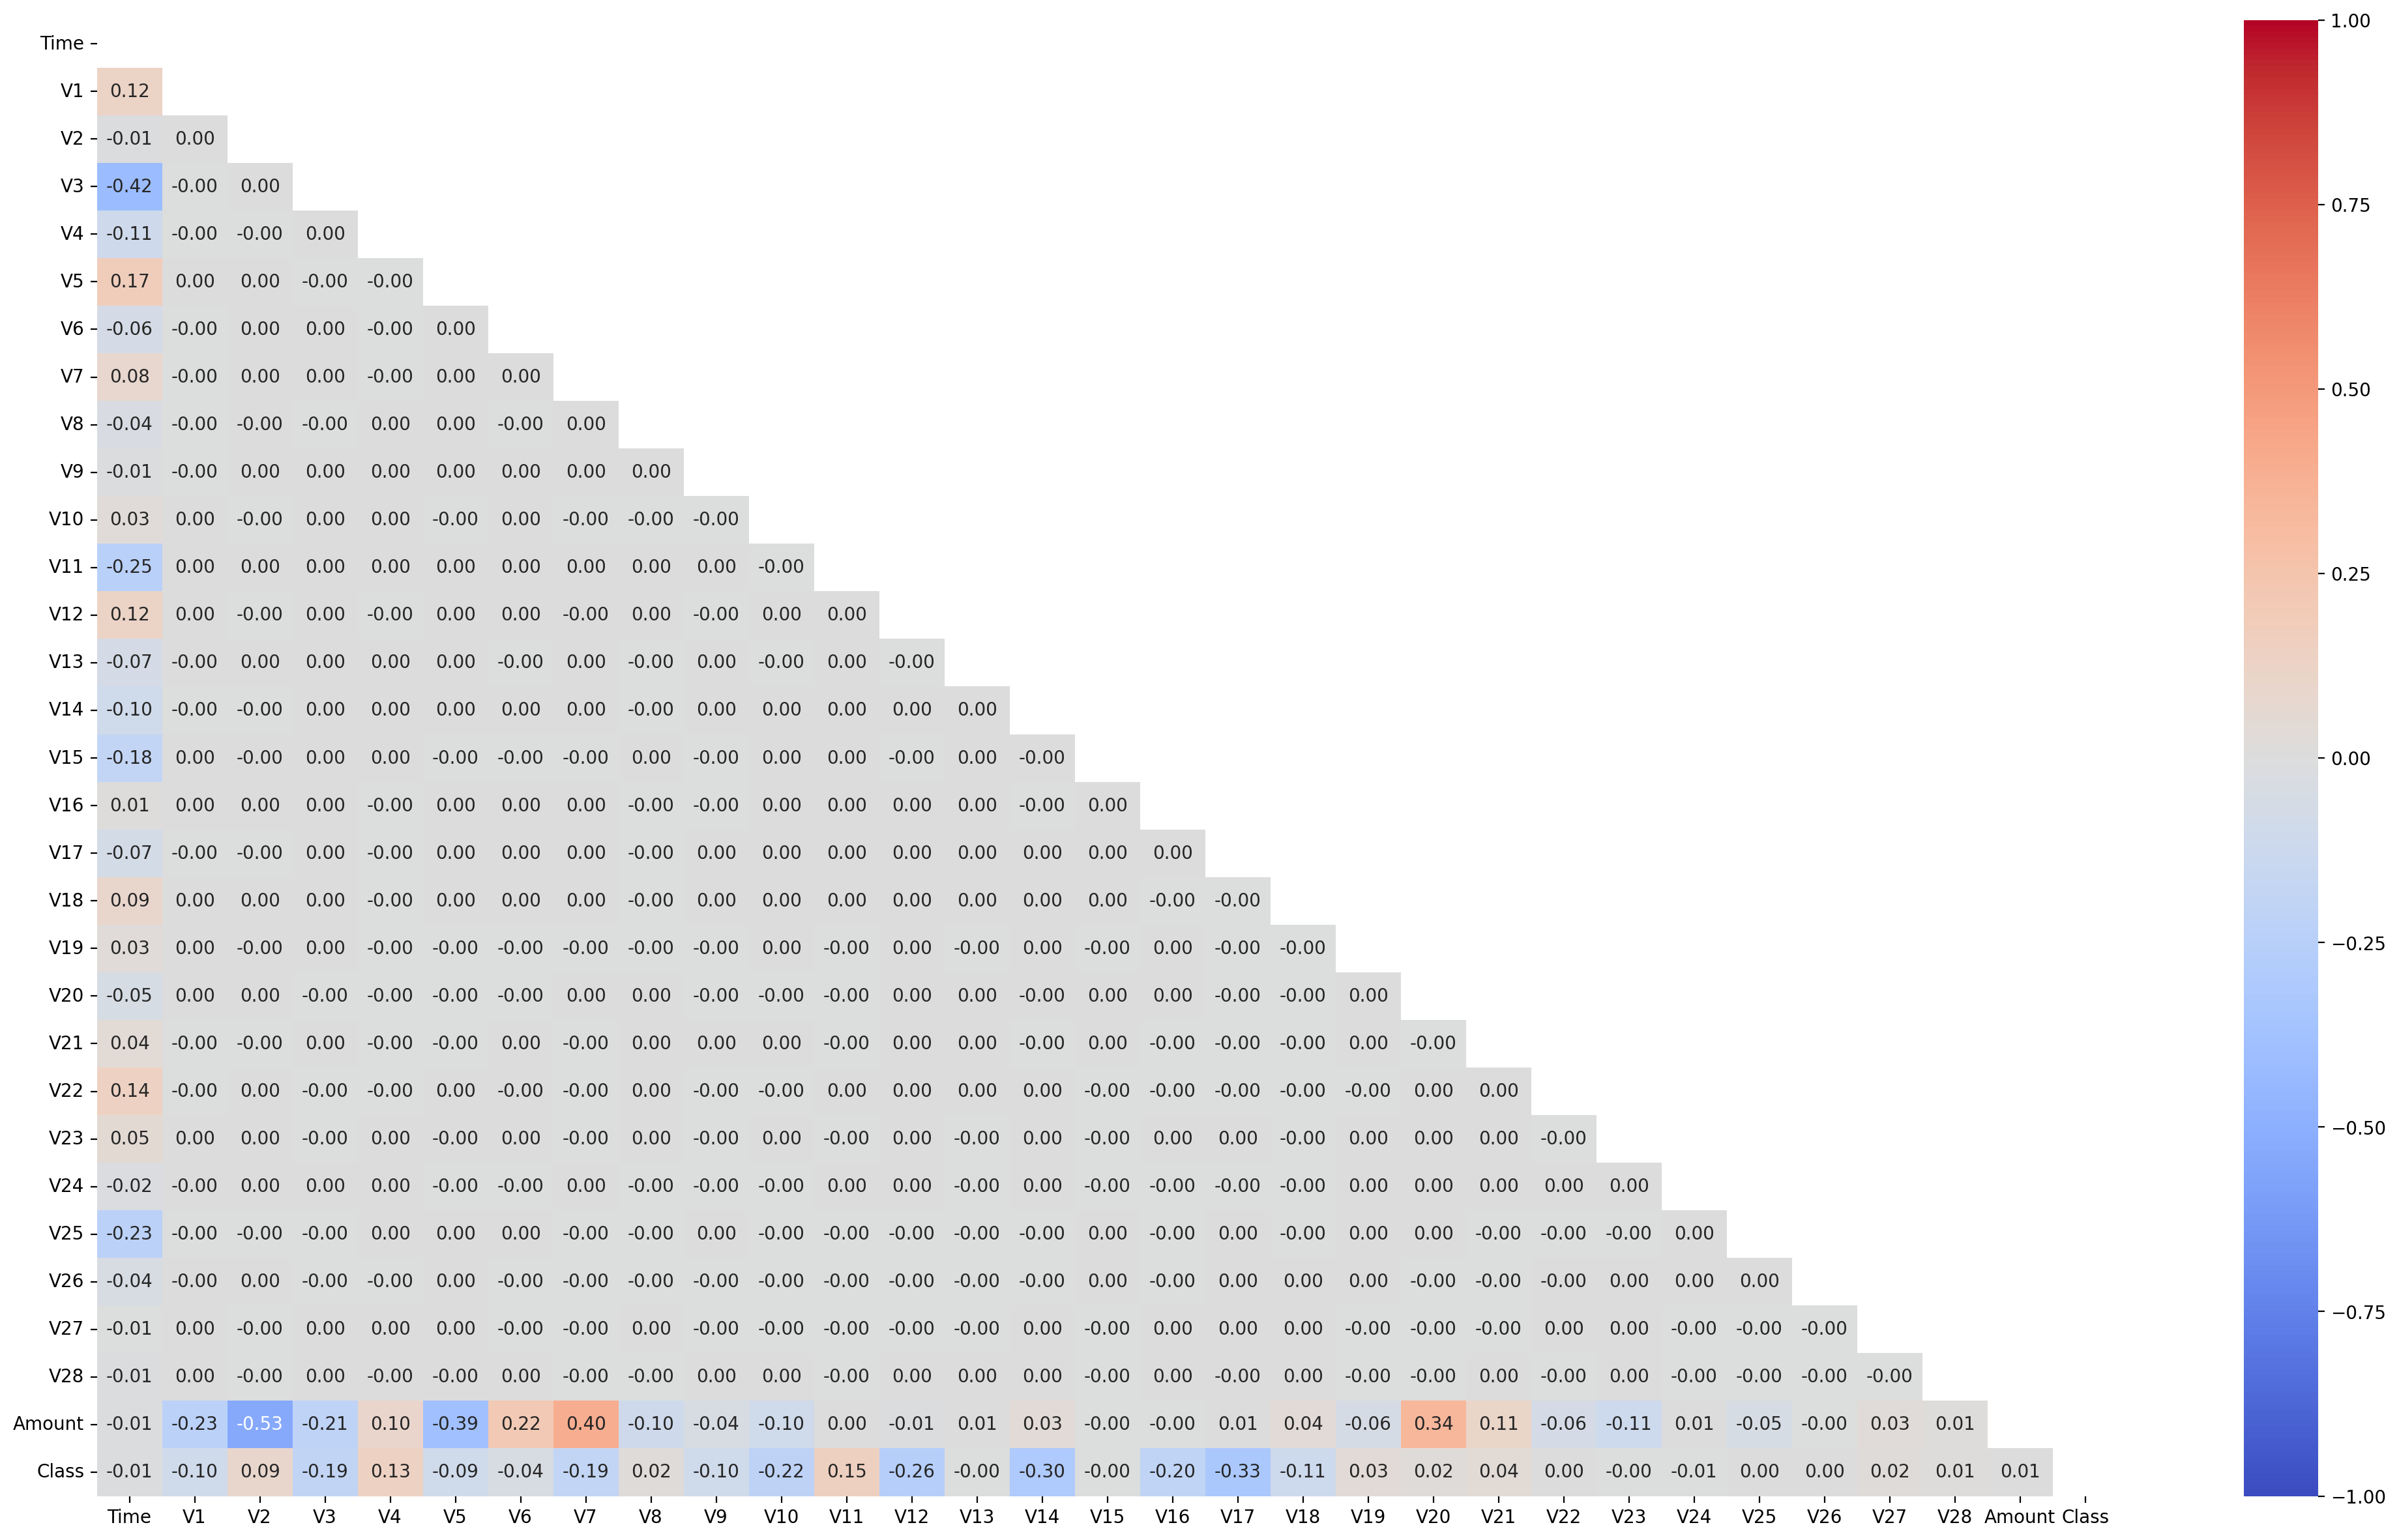

In [7]:
# Creating a correlation map
mask = np.triu(df.corr())
plt.figure(figsize=(25, 15), dpi=200)
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True,
           fmt='.2f',
           mask=mask)
plt.show(block=False)

### Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [9]:
classes

0    284315
1       492
Name: Class, dtype: int64

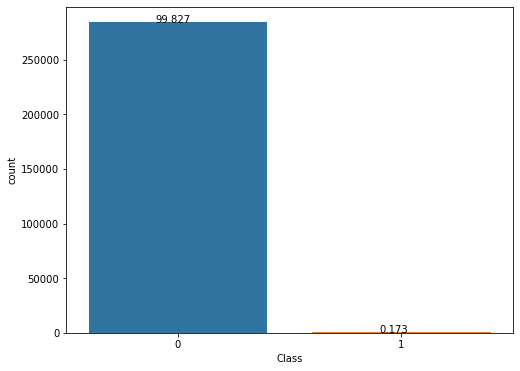

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.Class)
for p in ax.patches:
        ax.annotate('{}'.format(round((p.get_height()/len(df.Class))*100, 3)), (p.get_x()+0.3, p.get_height()+100))

## Relation between Time and Amount

In [11]:
df['TimeMin'] = df['Time'] / 60
df['TimeHour'] = df['Time'] / 60**2

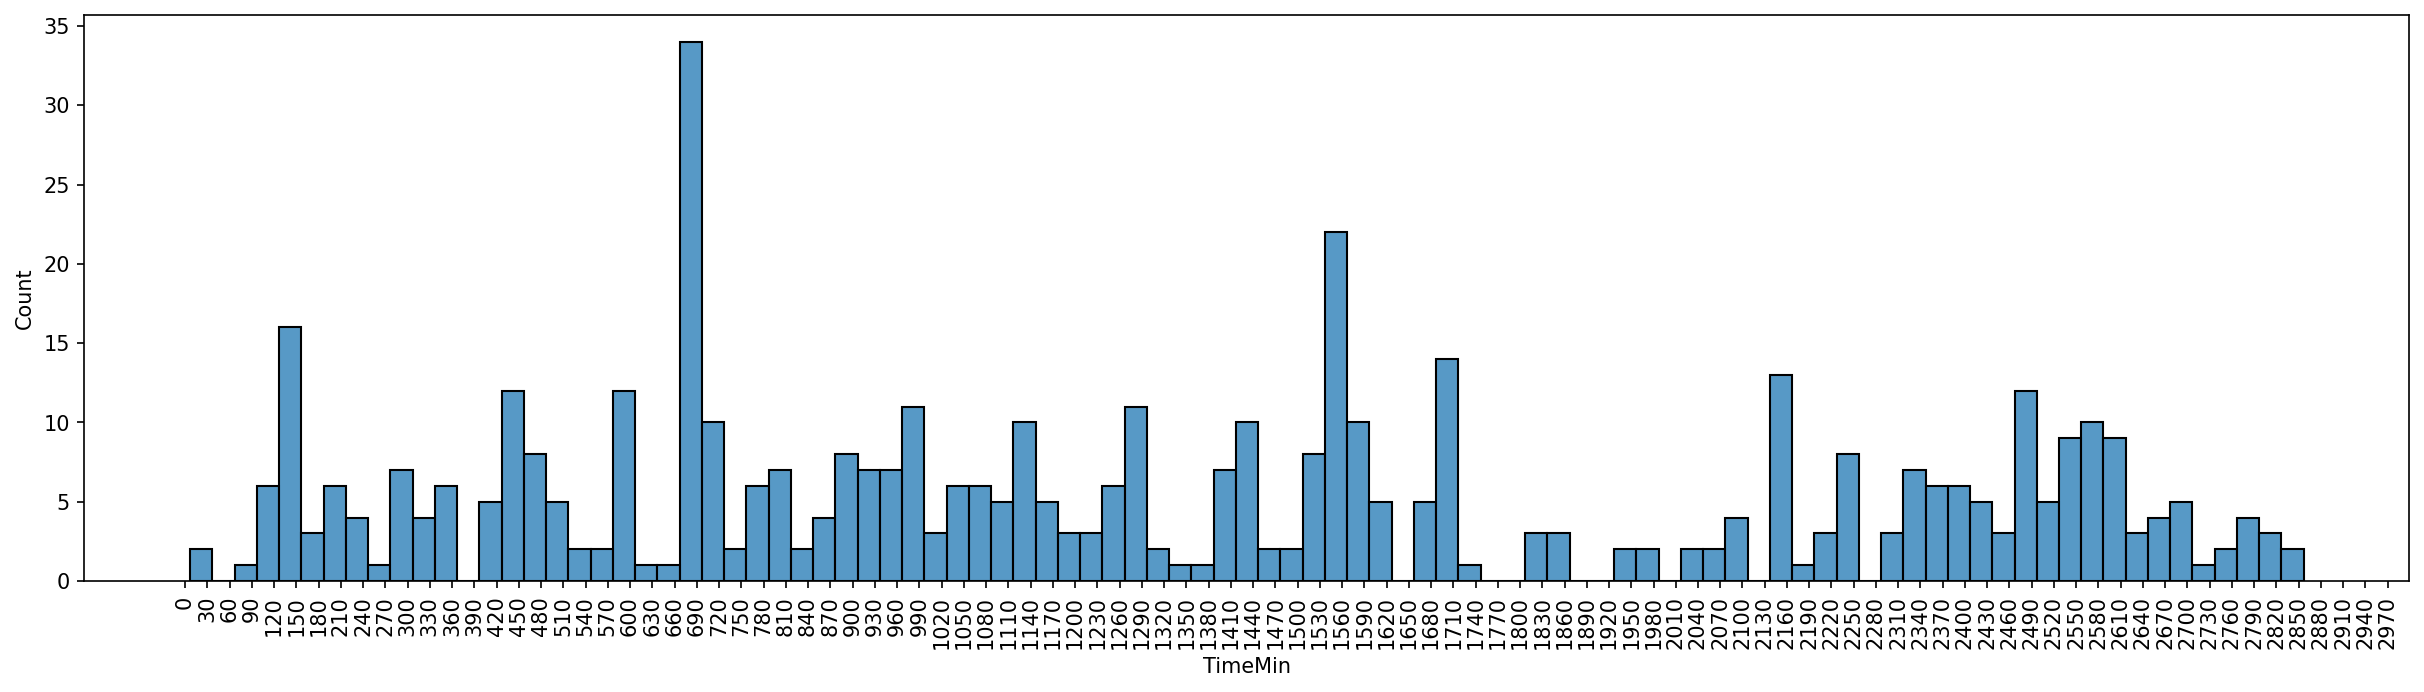

In [12]:
plt.figure(figsize=(20, 5), dpi=150)
sns.histplot(df[df.Class==1].TimeMin, binwidth=30)
plt.xticks(range(0, 3000, 30), range(0, 3000, 30), rotation=90)
plt.show(block=False)

### Findings
1. Some Fraudulent transactions occur right in the first hour but the count is very low.
2. Most of the fradulent transactions happened after 660-690 mins

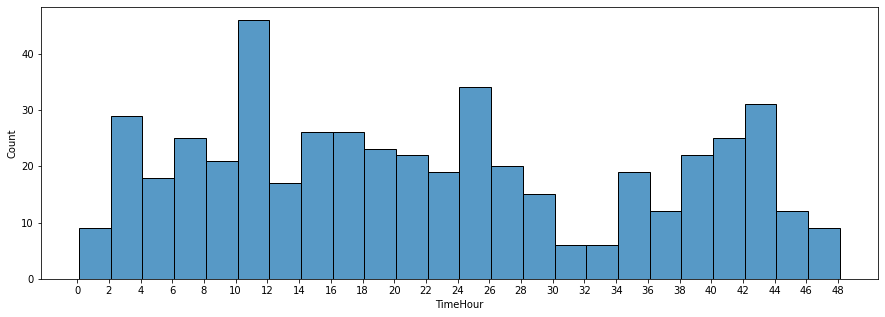

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df.Class==1].TimeHour, binwidth=2)
plt.xticks(range(0, 50, 2), range(0, 50, 2))
plt.show(block=False)

## Amount

In [14]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

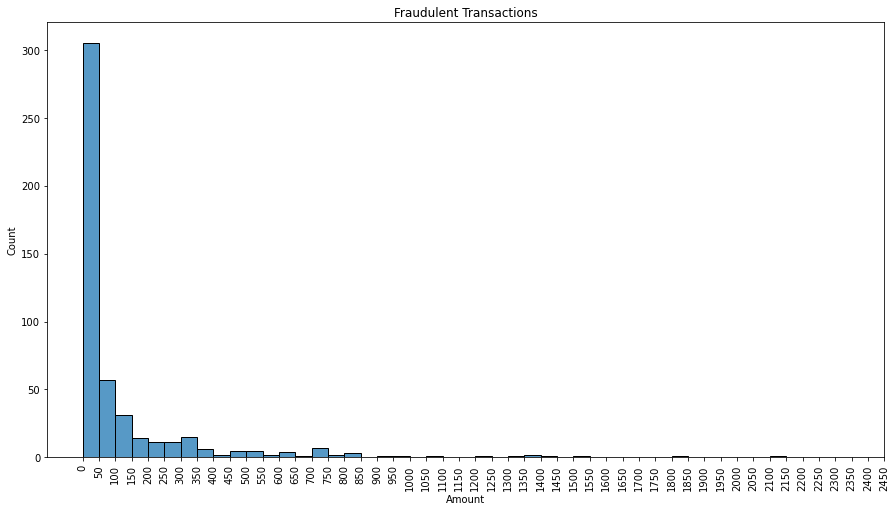

In [15]:
plt.figure(figsize=(15, 8))
plt.title("Fraudulent Transactions")
sns.histplot(df[df.Class==1].Amount, binwidth=50)
plt.xticks(range(0, 2500, 50), range(0, 2500, 50), rotation=90)
plt.show()

### Findings
1. Most of the fradulent transactions are in the range of 0-50 dollars
2. Highest Fraud transaction was at between 2100-2150 dollars

## Amount and Class

<AxesSubplot:xlabel='Amount', ylabel='Class'>

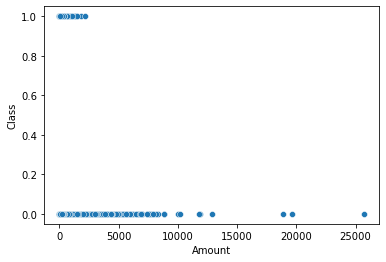

In [16]:
sns.scatterplot(df.Amount, df.Class)

### Findings
1. Even before trying out the graph above, we already saw that the maximum fraudulent transaction was between 2100-2150 dollars
2. We can check and see the Amount column in order to constraint the datapoints to look at transactions that are worth less than 2500 dollars.

## Time and Class

<AxesSubplot:xlabel='Time', ylabel='Class'>

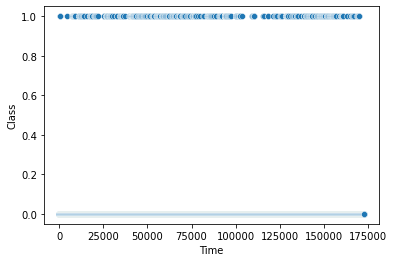

In [17]:
sns.scatterplot(df.Time, df.Class)

### Findings
1. We can see that fradulent cases can happen between any timeframe which does not conclude any particular timeframe for a fradulent transaction. So we can remove Time variable

In [18]:
df.drop(['Time', 'TimeMin', 'TimeHour'], axis=1, inplace=True)

# Train test split

In [19]:
# Train test split
y = df.pop("Class")
X = df

# Using stratify=y for splitting data into stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)

# Checking for variable distribution

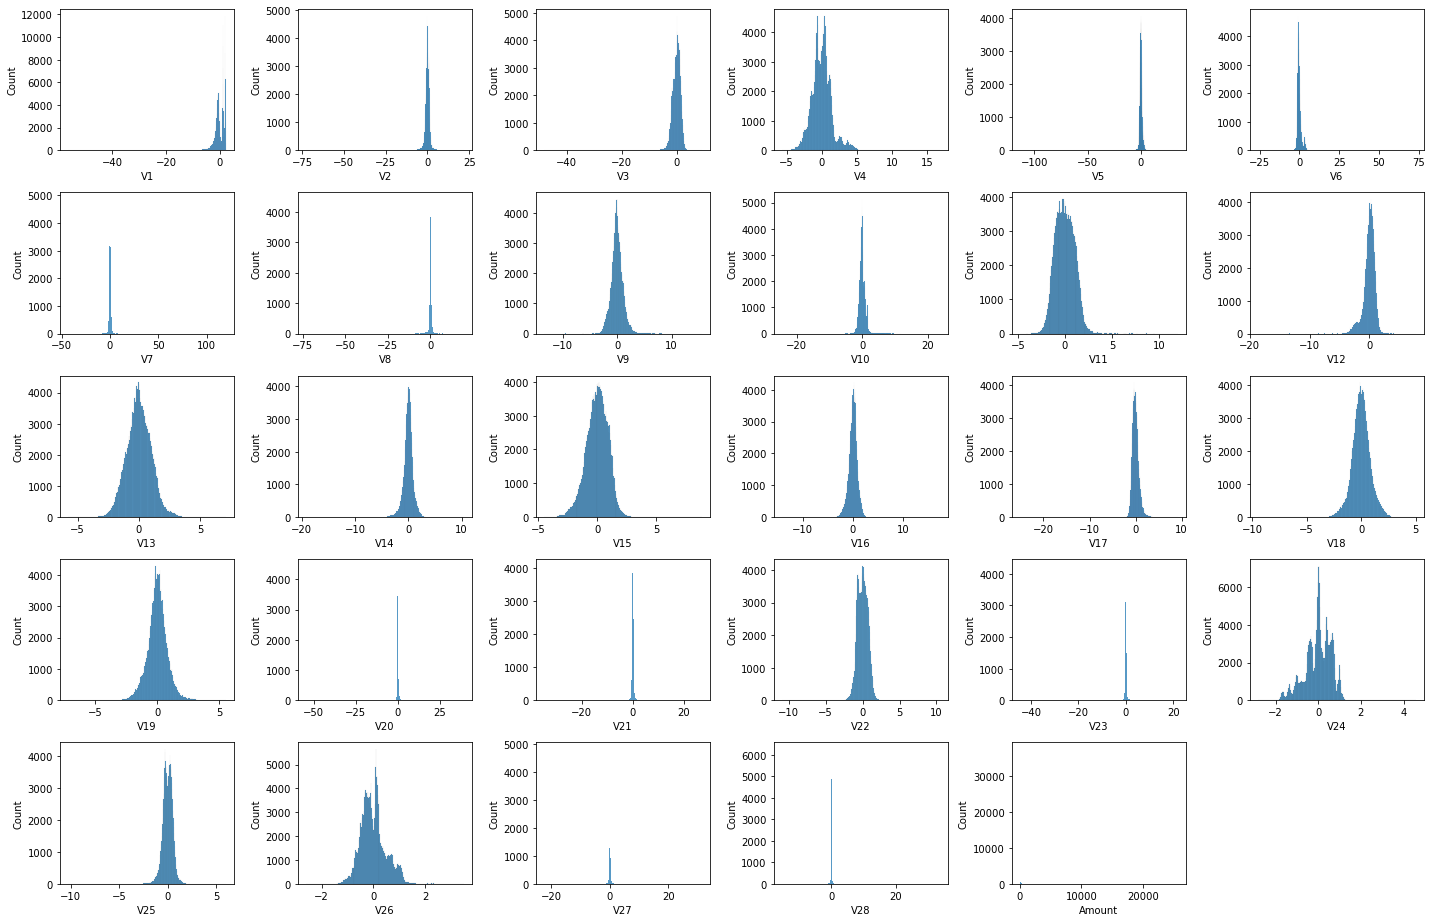

In [20]:
# plot the histogram of a variable from the dataset
plt.figure(figsize=(20, 15))
for i in range(1, 30):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1])
plt.tight_layout()
plt.show(block=False)

In [21]:
# Skewness in data to filter the values which are beyond
# -0.5 and +0.5 to calculate skewness in a variable
skewness = df.skew()

In [22]:
# Subset of columns  with below condition
columns = skewness[(skewness < -0.5) | (skewness > 0.5)].index

In [23]:
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12',
       'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

In [24]:
# Using PowerTransformer for Apply a power transform featurewise to make
# data more Gaussian-like for both X_train and X_test
power = PowerTransformer()
X_train[columns] = power.fit_transform(X_train[columns])
X_test[columns] = power.fit_transform(X_test[columns])

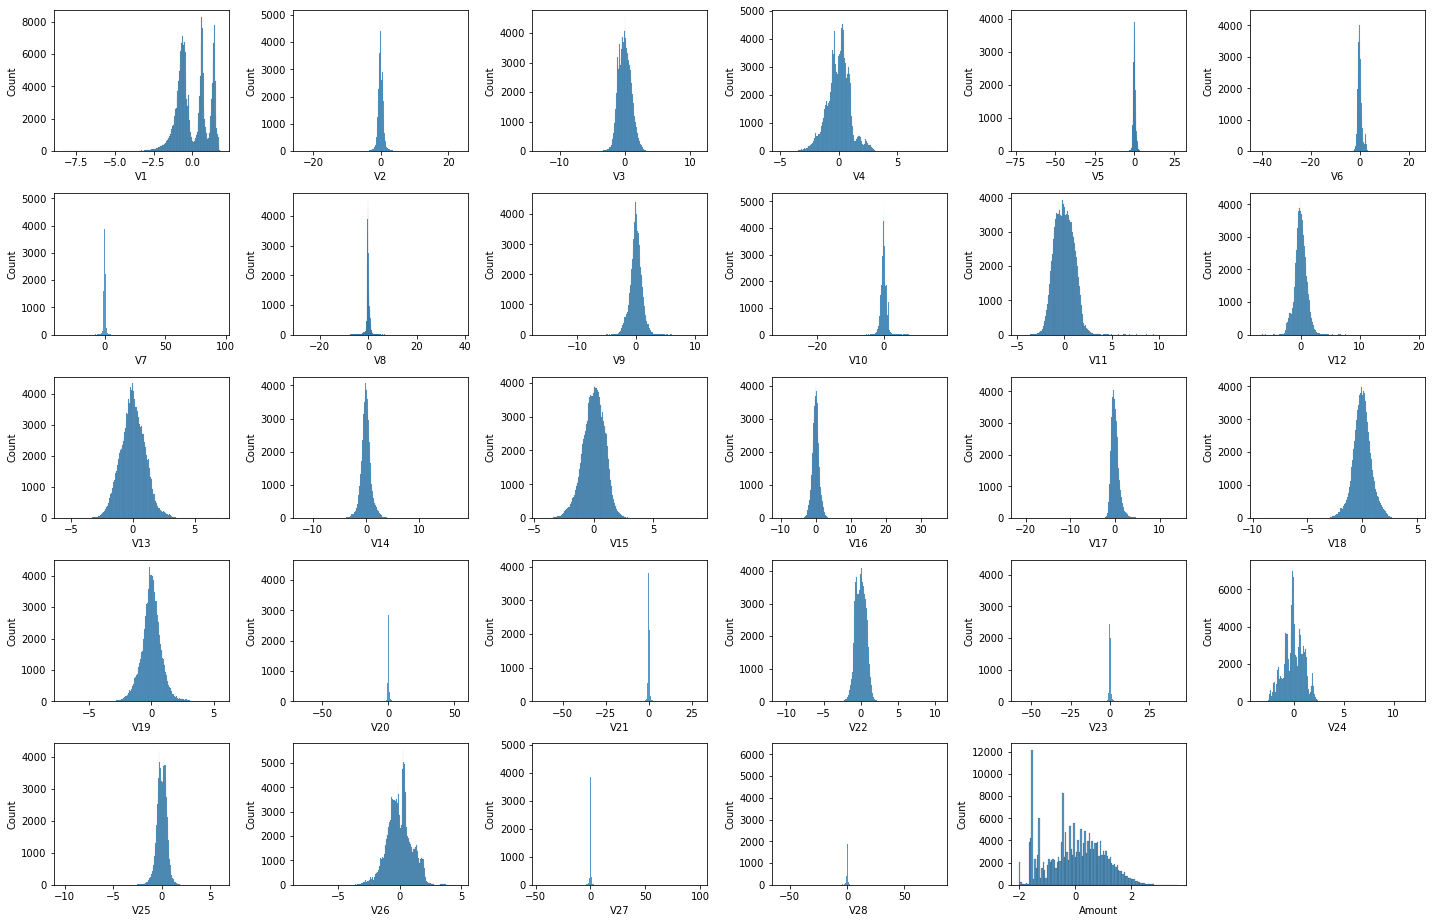

In [25]:
# plot the histogram of a variable from the dataset after power transformation
plt.figure(figsize=(20, 15))
for i in range(1, 30):
    plt.subplot(6, 6, i)
    sns.histplot(X_train.iloc[:, i-1])
plt.tight_layout()
plt.show(block=False)

# Results

In [26]:
# creating a results dataframe for later to evaluate the models
results = pd.DataFrame(columns = ['model_name', 'threshold', 'recall', 'roc_auc_score'])

# Model Evaluation Function

In [27]:
def model_evaluation(y_pred_proba_test):
#     Report for different thresholds
    thresholds = [i * 0.1 for i in range(0, 10)]
    print("----------------------------Results----------------------------")
#     best ROC score initialisation
    best_roc_score = 0

#     Iterating through every threshold from 0.1 to 0.9
    for threshold in thresholds:
        y_pred = np.where(y_pred_proba_test[:, 1] > threshold, 1, 0)
#   Calculating different metrics
        accuracy = str(round(metrics.accuracy_score(y_test, y_pred), 3))
        precision = str(round(metrics.precision_score(y_test, y_pred), 3))
        recall = str(round(metrics.recall_score(y_test, y_pred), 3))
        roc_auc = str(round(metrics.roc_auc_score(y_test, y_pred), 3))
#   Setting the best roc score, threshold, recall scores.
        if float(roc_auc) > best_roc_score:
            best_roc_score = float(roc_auc)
            best_threshold = threshold
            best_recall_score = recall
#   printing the results for every threshold 
        print("----------for Test with threshold", round(threshold, 2), "----------")
        print("accuracy\tprecision\trecall\t\troc_auc")
        print("\t\t".join([accuracy, precision, recall, roc_auc]))
        print("\n")
#   Confusion Matrix
        print("\t\tCONFUSION MATRIX")
        confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
                                        columns=['Predicted Negative', 'Predicted Positive'],
                                        index=['Actual Negative', 'Actual Positive'])
        print(confusion_matrix)
        print("\n")
    print("BEST ROC AUC SCORE is ", best_roc_score, "at the threshold", best_threshold)
    return best_roc_score, best_threshold, best_recall_score

# Draw ROC

In [28]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression

In [29]:
# Initial model
logit = LogisticRegression()
# Folds for crossvalidation
cv = KFold(3)
# Setting paramters
param_grid={
    'solver':['saga', 'lbfgs']
}
# Grid search for running model with every possible combimnation
# that is defined with above param_grid
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

# Taking the best estimator and fitting data
best_logit = grid.best_estimator_
best_logit.fit(X_train, y_train)

# Taking probabilities for model evaluation with different thresholds
y_pred_proba_test = best_logit.predict_proba(X_test)
# Model Evaluation
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION IMB', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


BEST GRID SCORE 0.9823217282784347
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.75		0.805		0.902


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71046                  33
Actual Positive                  24                  99


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.85		0.78		0.89


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71062                  17
Actual Positive          

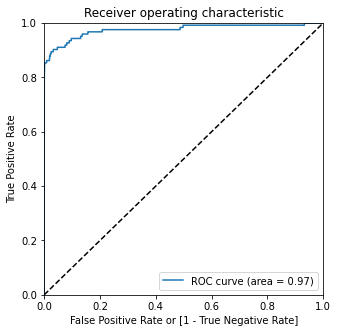

In [30]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Using the same format and steps as used above for every model running to avoid redundant commenting and confusion in code

# KNN

In [31]:
knn = KNeighborsClassifier()
cv = KFold(3)
param_grid={
    'n_neighbors':[3, 5],
}
grid = GridSearchCV(knn,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)
y_pred_proba_test = best_knn.predict_proba(X_test)

model_evaluation(y_pred_proba_test)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9173235342569388
BEST GRID PARAMS
{'n_neighbors': 5}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.999		0.6		0.878		0.939


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71007                  72
Actual Positive                  15                 108


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.6		0.878		0.939


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71007                  72
Actual Positive                  15                 108


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.877		0.813		0.906


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative   

(0.939, 0.0, '0.878')

# Decision Tree

In [32]:
dt = DecisionTreeClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'criterion':['entropy'],
    'max_depth':[5, 10],
    'min_samples_leaf':[100],
    'min_samples_split': [50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9621428384145779
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.998		0.513		0.821		0.91


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               70983                  96
Actual Positive                  22                 101


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.998		0.513		0.821		0.91


		CONFUSION MATRIX
    

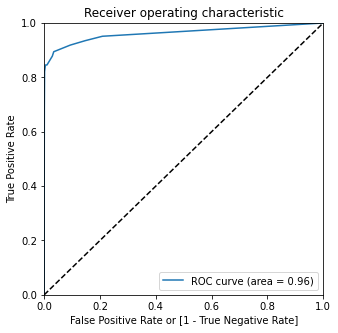

In [33]:
draw_roc(y_test, y_pred_proba_test[:, 1])

Top var = 17
2nd Top var = 14
3rd Top var = 4


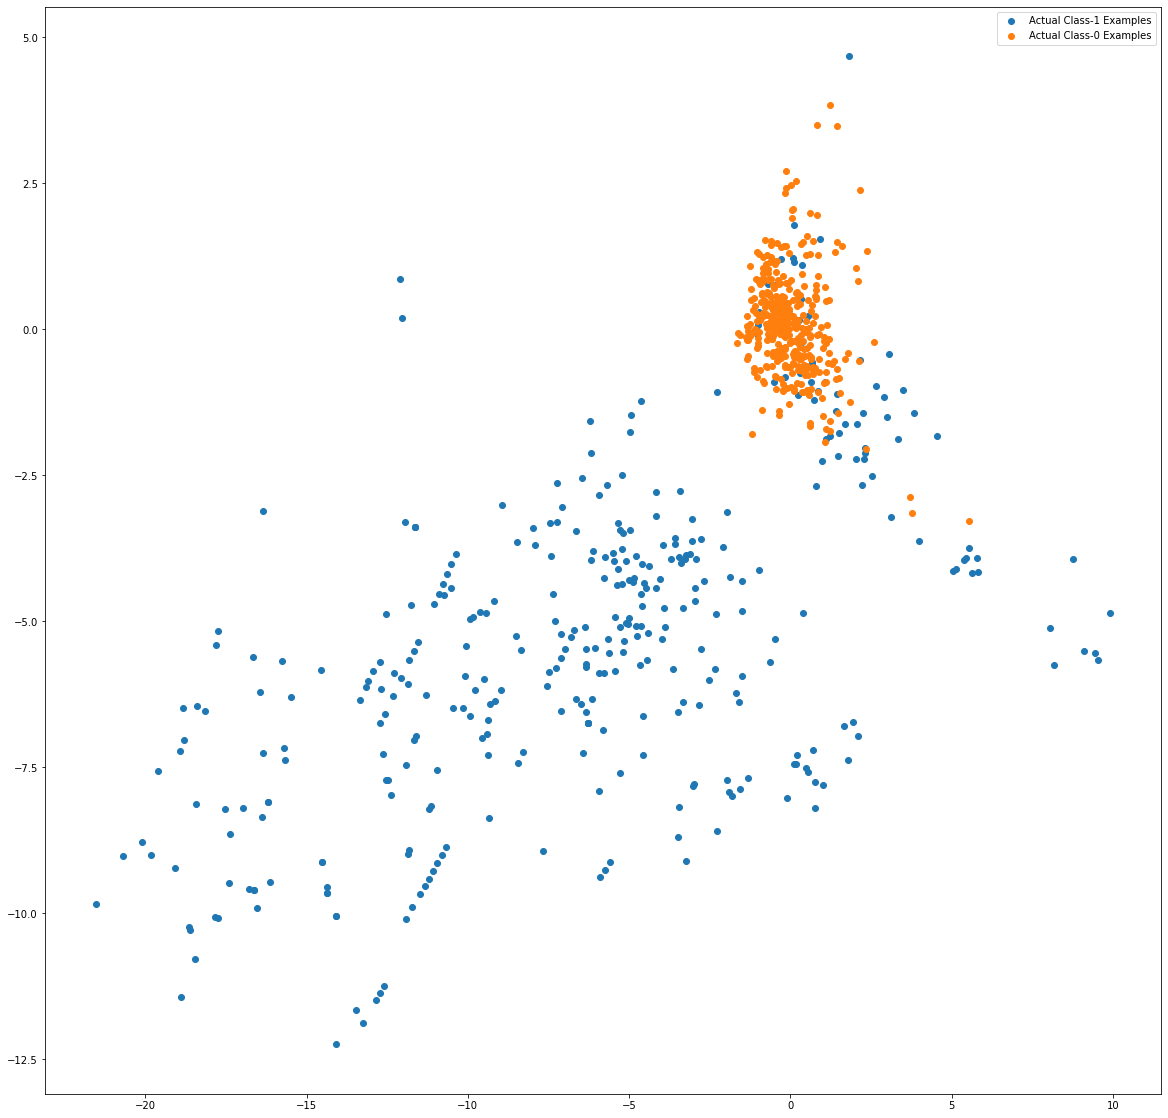

In [34]:
var_imp = []
for i in best_dt.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(best_dt.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(best_dt.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Random Forest

In [35]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[10],
    'min_samples_leaf':[50, 100],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1000,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9780724890025633
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.582		0.837		0.918


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71005                  74
Actual Positive                  20                 103


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.688		0.805		0.902


		CONFUSION MATRIX
    

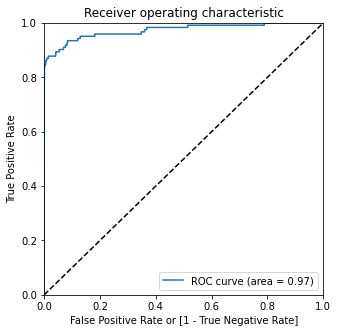

In [36]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# XGBoost

In [37]:
# kfold = KFold(3, shuffle=True)


param_grid = {'min_child_weight': [11], 
              'max_depth': [5, 6],
              'learning_rate': [0.1, 0.2]}

xgbc = xgb.XGBClassifier(eval_metric='logloss',
                         n_estimators=200,
                         use_label_encoder=False)

grid = GridSearchCV(estimator = xgbc, 
                    param_grid = param_grid, 
                    scoring= 'roc_auc', 
                    cv = 3, 
                    n_jobs=-1,
                    verbose = 1000)      

grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_xgb = grid.best_estimator_
best_xgb.fit(X_train, y_train)

y_pred_proba_test = best_xgb.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['XGBOOST', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


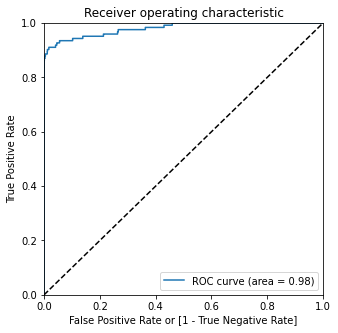

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Class Imbalance techniques

1. Random Oversampling
2. SMOTE
3. ADASYN

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_over.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

## Logistic Regression with Balanced Dataset

In [ ]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs']
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_over, y_over)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.982326629711841
BEST GRID PARAMS
{'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.82		0.009		0.951		0.885


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               58265               12814
Actual Positive                   6                 117


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.905		0.017		0.927		0.916


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative     

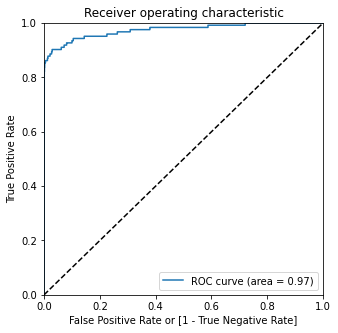

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## Decision Tree with Balanced Dataset

In [ ]:
dt = DecisionTreeClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'criterion':['entropy'],
    'max_depth':[5, 10],
    'min_samples_leaf':[50],
    'min_samples_split': [25, 50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_over, y_over)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9585721692432898
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 25}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.523		0.003		0.886		0.704


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               37126               33953
Actual Positive                  14                 109


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.94		0.024		0.854		0.897


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               66802                4277
Actual Positive                  18                 105


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.94		0.024		0.854		0.897


		CONFUSION MATRIX


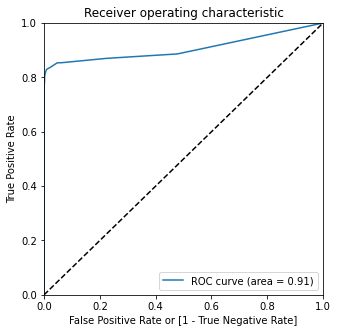

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Random Forest with OverSampling

In [ ]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[5, 10],
    'min_samples_leaf':[50],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1000,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_over, y_over)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9762285924561686
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.971		0.051		0.902		0.937


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               69015                2064
Actual Positive                  12                 111


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.994		0.215		0.878		0.936


		CONFUSION MATRIX
    

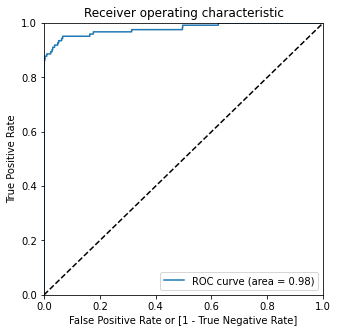

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## XGBoost with Balanced Dataset

In [ ]:
# kfold = KFold(3, shuffle=True)


param_grid = {'min_child_weight': [11], 
              'max_depth': [5, 6],
              'learning_rate': [0.1, 0.2]}

xgbc = xgb.XGBClassifier(eval_metric='logloss',
                         n_estimators=200,
                         use_label_encoder=False)

grid = GridSearchCV(estimator = xgbc, 
                    param_grid = param_grid, 
                    scoring= 'roc_auc', 
                    cv = 3, 
                    n_jobs=-1,
                    verbose = 1000)      

grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_xgb = grid.best_estimator_
best_xgb.fit(X_over, y_over)

y_pred_proba_test = best_xgb.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['XGBOOST OVERSAMPLING', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9827897379484042
BEST GRID PARAMS
{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 11}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.999		0.636		0.854		0.926


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               71019                  60
Actual Positive                  18                 105


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.999		0.722		0.846		0.922


		CONFUSION MATRIX
                 Predicted Ne

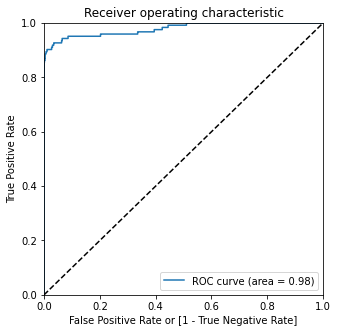

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# SMOTE

In [ ]:
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [ ]:
y_smote.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

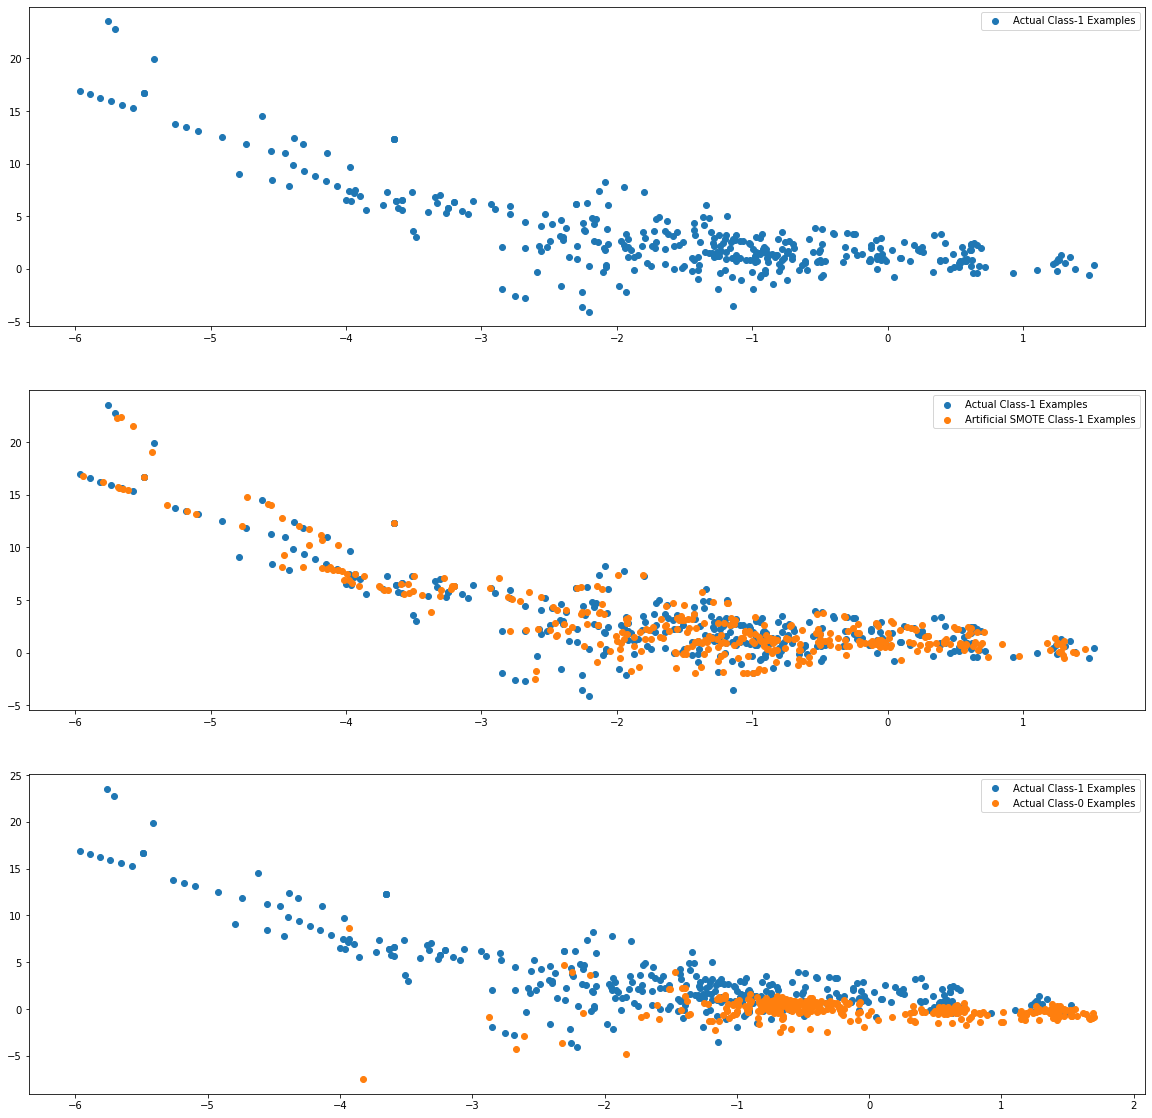

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression with Balanced Dataset

In [ ]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs'],
    'C':[0.01, 10]
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_smote, y_smote)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9824139945243382
BEST GRID PARAMS
{'C': 0.01, 'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.816		0.009		0.951		0.883


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               57949               13130
Actual Positive                   6                 117


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.905		0.016		0.911		0.908


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual

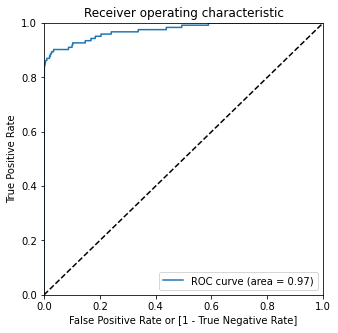

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## Decision Tree with Balanced Dataset

In [ ]:
dt = DecisionTreeClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'criterion':['entropy'],
    'max_depth':[5, 10],
    'min_samples_leaf':[25],
    'min_samples_split': [10]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_smote, y_smote)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
BEST GRID SCORE 0.9507653575033816
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 10}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.013		0.002		0.984		0.498


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                 815               70264
Actual Positive                   2                 121


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.871		0.012		0.886		0.879


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               61935                9144
Actual Positive                  14                 109


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.871		0.012		0.886		0.879


		CONFUSION MATRIX

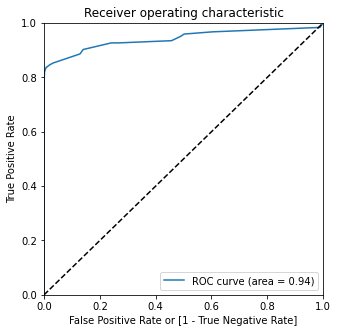

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Random Forest with SMOTE

In [ ]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[10],
    'min_samples_leaf':[50, 100],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1000,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_smote, y_smote)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9783309051107718
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.913		0.019		0.951		0.932


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               64886                6193
Actual Positive                   6                 117


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.973		0.054		0.902		0.938


		CONFUSION MATRIX
    

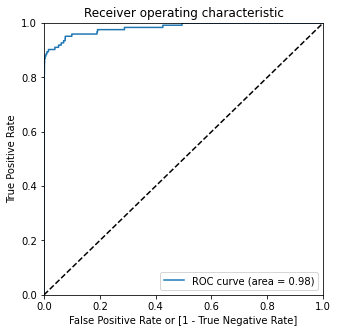

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## XGBoost with Balanced Dataset

In [ ]:
# kfold = KFold(3, shuffle=True)


param_grid = {'min_child_weight': [11], 
              'max_depth': [5, 6],
              'learning_rate': [0.1, 0.2]}

xgbc = xgb.XGBClassifier(eval_metric='logloss',
                         n_estimators=200,
                         use_label_encoder=False)

grid = GridSearchCV(estimator = xgbc, 
                    param_grid = param_grid, 
                    scoring= 'roc_auc', 
                    cv = 3, 
                    n_jobs=-1,
                    verbose = 1000)      

grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_xgb = grid.best_estimator_
best_xgb.fit(X_smote, y_smote)

y_pred_proba_test = best_xgb.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['XGBOOST SMOTE', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9827897379484042
BEST GRID PARAMS
{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 11}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.991		0.153		0.878		0.935


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               70483                 596
Actual Positive                  15                 108


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.994		0.22		0.878		0.936


		CONFUSION MATRIX
                 Predicted Neg

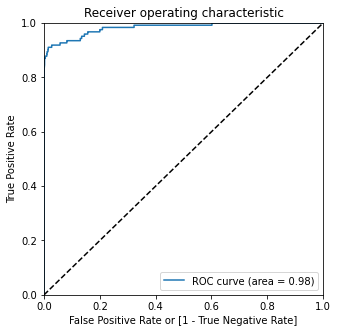

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# ADASYN

In [ ]:
sm = ADASYN()
X_adasyn, y_adasyn = sm.fit_resample(X_train, y_train)

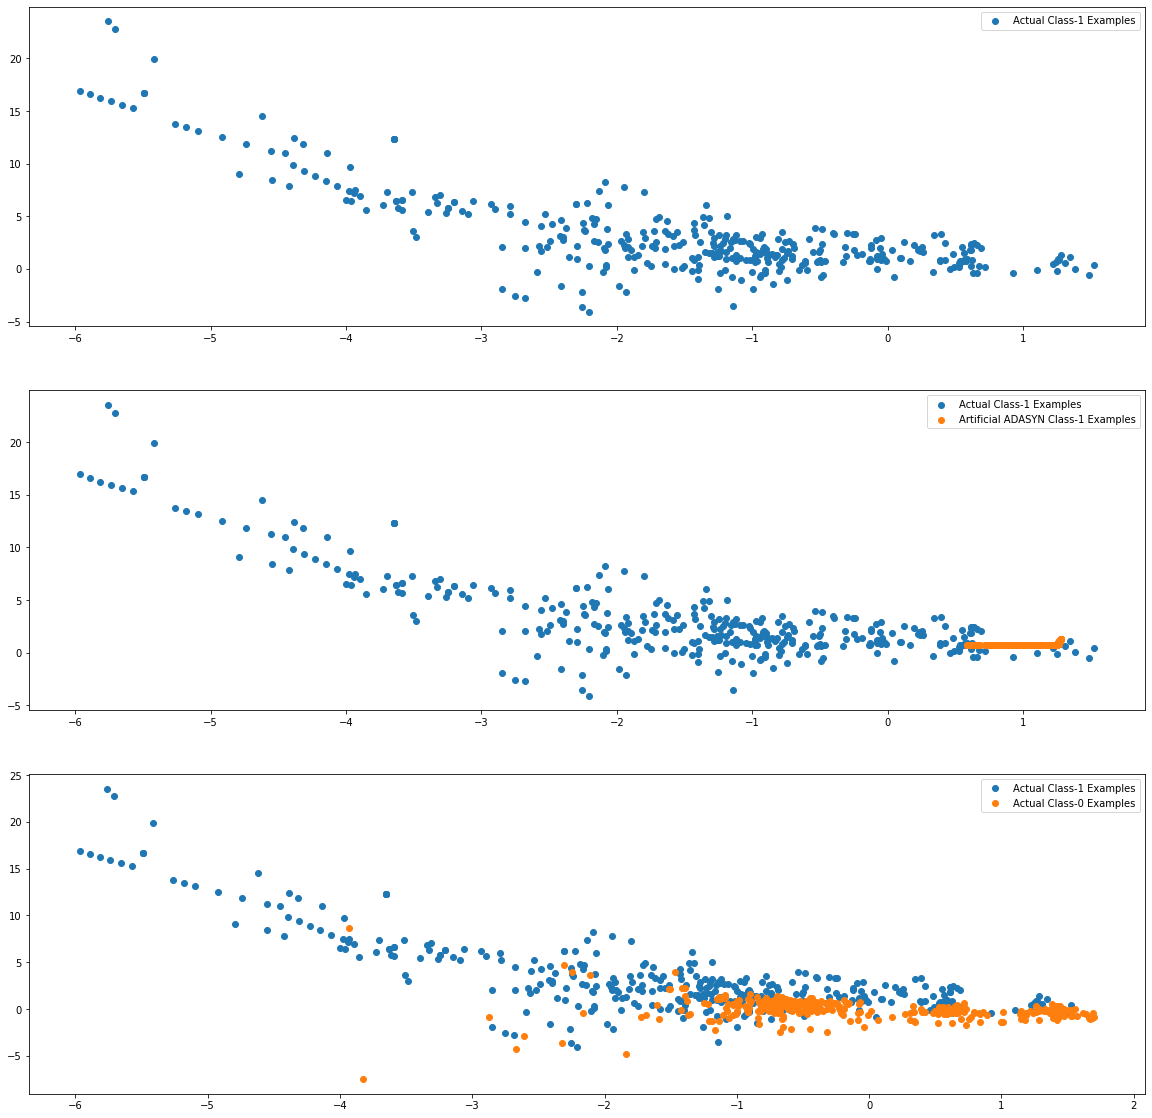

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression with Balanced Dataset

In [ ]:
logit = LogisticRegression()
cv = KFold(3)
param_grid={
    'solver':['saga', 'lbfgs'],
    'C':[0.01, 0.1, 1, 10]
}
grid = GridSearchCV(logit,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_logit = grid.best_estimator_
best_logit.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_logit.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['LOGISTIC REGRESSION ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
BEST GRID SCORE 0.9824133433919342
BEST GRID PARAMS
{'C': 0.01, 'solver': 'saga'}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.637		0.005		0.976		0.806


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               45251               25828
Actual Positive                   3                 120


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.771		0.007		0.967		0.869


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual

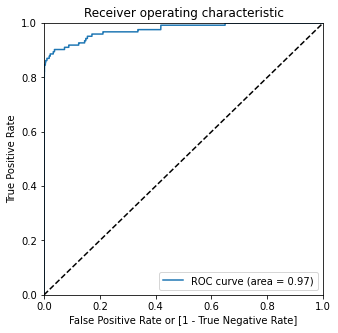

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## Decision Tree with Balanced Dataset

In [ ]:
dt = DecisionTreeClassifier()
cv = KFold(3)
param_grid={
    'criterion':['entropy'],
    'max_depth':[10],
    'min_samples_leaf':[200, 300],
    'min_samples_split': [20, 50]
}
grid = GridSearchCV(dt,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   cv=cv,
                   n_jobs=-1,
                   verbose=1000)
grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_dt = grid.best_estimator_
best_dt.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_dt.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['DECISION TREE ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9446756218001259
BEST GRID PARAMS
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 300, 'min_samples_split': 50}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.92		0.02		0.927		0.923


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               65395                5684
Actual Positive                   9                 114


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.936		0.024		0.911		0.923


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               66500                4579
Actual Positive                  11                 112


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.945		0.028		0.894		0.92


		CONFUSION MATRIX

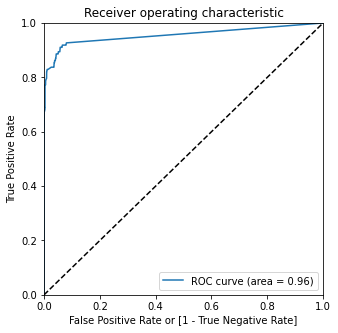

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Random Forests with Balanced Data

In [ ]:
rf = RandomForestClassifier()
cv = KFold(3, shuffle=True)
param_grid={
    'n_estimators':[200],
    'max_depth':[10],
    'min_samples_leaf':[50, 100],
    'min_samples_split':[25, 50]
}

grid = GridSearchCV(rf,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=cv,
                    verbose=1000,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)

best_rf = grid.best_estimator_
best_rf.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_rf.predict_proba(X_test)
best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['RANDOM FOREST ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9792869030508798
BEST GRID PARAMS
{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 200}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.834		0.01		0.959		0.897


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               59278               11801
Actual Positive                   5                 118


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.933		0.023		0.919		0.926


		CONFUSION MATRIX
     

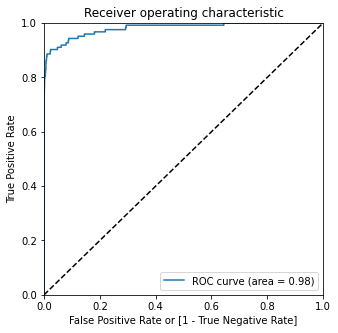

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

## XGBoost with Balanced Dataset

In [ ]:
# kfold = KFold(3, shuffle=True)


param_grid = {'min_child_weight': [11], 
              'max_depth': [6, 7],
              'learning_rate': [0.1, 0.3]}

xgbc = xgb.XGBClassifier(eval_metric='logloss',
                         n_estimators=200,
                         use_label_encoder=False)

grid = GridSearchCV(estimator = xgbc, 
                    param_grid = param_grid, 
                    scoring= 'roc_auc', 
                    cv = 3, 
                    n_jobs=-1,
                    verbose = 1000)      

grid.fit(X_train, y_train)
print("BEST GRID SCORE", grid.best_score_)
print("BEST GRID PARAMS")
print(grid.best_params_)
best_xgb = grid.best_estimator_
best_xgb.fit(X_adasyn, y_adasyn)

y_pred_proba_test = best_xgb.predict_proba(X_test)

best_roc_score, best_threshold, best_recall_score = model_evaluation(y_pred_proba_test)
# 'model_name', 'threshold', 'recall', 'roc_auc_score'
data = pd.DataFrame([['XGBOOST ADASYN', best_threshold, best_recall_score, best_roc_score]],
                    columns=results.columns)
results = results.append(data, ignore_index=False)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
BEST GRID SCORE 0.9830032901275402
BEST GRID PARAMS
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 11}
----------------------------Results----------------------------
----------for Test with threshold 0.0 ----------
accuracy	precision	recall		roc_auc
0.002		0.002		1.0		0.5


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative                   0               71079
Actual Positive                   0                 123


----------for Test with threshold 0.1 ----------
accuracy	precision	recall		roc_auc
0.993		0.173		0.87		0.931


		CONFUSION MATRIX
                 Predicted Negative  Predicted Positive
Actual Negative               70566                 513
Actual Positive                  16                 107


----------for Test with threshold 0.2 ----------
accuracy	precision	recall		roc_auc
0.995		0.234		0.862		0.928


		CONFUSION MATRIX
                 Predicted Neg

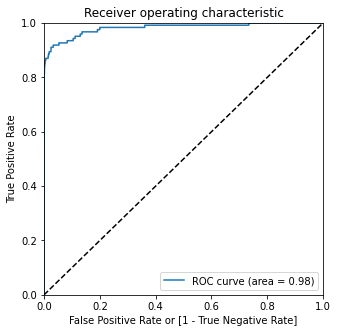

In [ ]:
draw_roc(y_test, y_pred_proba_test[:, 1])

# Results DataFrame

In [ ]:
results.sort_values("recall", ascending=False, inplace=True)
# results.to_csv("results.csv")
results

,model_name,threshold,recall,roc_auc_score
0,DECISION TREE ADASYN,0.0,0.927,0.923
0,LOGISTIC REGRESSION OVERSAMPLING,0.4,0.902,0.932
0,RANDOM FOREST OVERSAMPLING,0.1,0.902,0.937
0,LOGISTIC REGRESSION SMOTE,0.4,0.902,0.932
0,RANDOM FOREST SMOTE,0.2,0.902,0.938
0,LOGISTIC REGRESSION ADASYN,0.7,0.902,0.930
0,RANDOM FOREST ADASYN,0.5,0.886,0.937
0,XGBOOST SMOTE,0.2,0.878,0.936
0,XGBOOST ADASYN,0.1,0.87,0.931
0,XGBOOST,0.1,0.854,0.927


# Results Summary
1. The best recall is given by Decision Tree with ADASYN as data balance algorithms
2. The threshold above is listed as 0 which is invalid, so checked with 0.1, which is giving similar results.

    ----------for Test with threshold 0.1 ----------

    accuracy	precision	recall		roc_auc
    0.936		0.024		0.911		0.923


                        CONFUSION MATRIX
                     Predicted Negative  Predicted Positive
    Actual Negative               66500                4579
    Actual Positive                  11                 112

### Some other best models were
    LOGISTIC REGRESSION OVERSAMPLING	0.4	0.902	0.932
    ----------for Test with threshold 0.4 ----------
        accuracy	precision	recall		roc_auc
        0.961		0.038		0.902		0.932


                            CONFUSION MATRIX
                     Predicted Negative  Predicted Positive
        Actual Negative               68306                2773
        Actual Positive                  12                 111
	
    RANDOM FOREST OVERSAMPLING	        0.1	0.902	0.937
    ----------for Test with threshold 0.1 ----------
        accuracy	precision	recall		roc_auc
        0.971		0.051		0.902		0.937


		CONFUSION MATRIX
                         Predicted Negative  Predicted Positive
        Actual Negative               69015                2064
        Actual Positive                  12                 111
        
	LOGISTIC REGRESSION SMOTE	        0.4	0.902	0.932
    ----------for Test with threshold 0.4 ----------
        accuracy	precision	recall		roc_auc
        0.962		0.04		0.902		0.932


		CONFUSION MATRIX
                         Predicted Negative  Predicted Positive
        Actual Negative               68416                2663
        Actual Positive                  12                 111
        
	RANDOM FOREST SMOTE             	0.2	0.902	0.938
    ----------for Test with threshold 0.2 ----------
        accuracy	precision	recall		roc_auc
        0.973		0.054		0.902		0.938


		CONFUSION MATRIX
                         Predicted Negative  Predicted Positive
        Actual Negative               69151                1928
        Actual Positive                  12                 111
        
	LOGISTIC REGRESSION ADASYN      	0.7	0.902	0.930
    ----------for Test with threshold 0.7 ----------
        accuracy	precision	recall		roc_auc
        0.957		0.035		0.902		0.93


		CONFUSION MATRIX
                         Predicted Negative  Predicted Positive
        Actual Negative               68018                3061
        Actual Positive                  12                 111


# Final Summary
So depending on the type of bank, we can present that model.

As per the notes we have in the model evaluation section:

For banks with a smaller average transaction value, you would want a high precision because you only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, you can add the human element to verify whether the transaction was made by calling the customer. However, when the precision is low, such tasks are a burden because the human element has to be increased.

**For XGBoost with Over Sampling gives us the best precision with pretty good results**

    ----------for Test with threshold 0.9 ----------
       
       accuracy	precision	recall		roc_auc
       1.0		0.925		0.797		0.898


		CONFUSION MATRIX
                     Predicted Negative  Predicted Positive
    Actual Negative               71071                   8
    Actual Positive                  25                  98

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So, consider the losses if the missed transaction was a high-value fraudulent one, for example, a transaction of $10,000?

**All the models above in the previous cell are giving out the same results**. So we can use their results as their recall are pretty high. So we can consider those models. **But the best model with high recall is Decision Tree with ADASYN**
    
    ----------for Test with threshold 0.1 ----------

    accuracy	precision	recall		roc_auc
    0.936		0.024		0.911		0.923


                        CONFUSION MATRIX
                     Predicted Negative  Predicted Positive
    Actual Negative               66500                4579
    Actual Positive                  11                 112